This function takes in a relation number as an integer and returns y (the stellar mass). The function also plots the corresponding fitting function in log scale with a label. Possible number inputs are 1-9. Refer to Table 4 in Pillepich et al. 2018 to determine the number for each fitting function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, MultipleLocator, ScalarFormatter

In [2]:
def illustris_relation(relation):
    Msol = 1
    M_500c = np.linspace(13,15)
    m = M_500c/Msol
    m0 = 14
    
    if relation == 1:
        a = 0.49
        b = 11.77
        sig = 0.12
        y = a*(m-m0)+b
        plot_label = "Central < 30 kpc"
        ylabel = r"Stellar Mass ($M_{stars, cen}$/$M_{\odot}$)"
        plt.fill_between(m,y+sig,y-sig,alpha=0.5)
        
    if relation == 2:
        a = 0.59
        b = 12
        sig = 0.13
        y = a*(m-m0)+b
        plot_label = "Central < 100 kpc"
        ylabel = r"Stellar Mass ($M_{stars, cen}$/$M_{\odot}$)"
        plt.fill_between(m,y+sig,y-sig,alpha=0.5)
        
    if relation == 3:
        a = 0.74
        b = 12.02
        sig = 0.12
        y = a*(m-m0)+b
        plot_label = "Central < 2 x r_(stars, 1/2)"
        ylabel = r"Stellar Mass ($M_{stars, cen}$/$M_{\odot}$)"
        plt.fill_between(m,y+sig,y-sig,alpha=0.5)
        
    if relation == 4:
        a = 1.01
        b = 12.01
        sig = 0.13
        y = a*(m-m0)+b
        plot_label = "ICL > 30 kpc"
        ylabel = r"Stellar Mass ($M_{stars, ICL}$/$M_{\odot}$)"
        plt.fill_between(m,y+sig,y-sig,alpha=0.5)
        
    if relation == 5:
        a = 1.25
        b = 11.74
        sig = 0.14
        y = a*(m-m0)+b
        plot_label = "ICL > 100 kpc"
        ylabel = r"Stellar Mass ($M_{stars, ICL}$/$M_{\odot}$)"
        plt.fill_between(m,y+sig,y-sig,alpha=0.5)
        
    if relation == 6:
        a = 0.77
        b = 11.72
        sig = 0.11
        y = a*(m-m0)+b
        plot_label = "ICL > 2 x r_(stars, 1/2)"
        ylabel = r"Stellar Mass ($M_{stars, ICL}$/$M_{\odot}$)"
        plt.fill_between(m,y+sig,y-sig,alpha=0.5)
        
    if relation == 7:
        a = 1.14
        b = 11.93
        sig = 0.22
        y = a*(m-m0)+b
        plot_label = "Satellites > 1e8 Msun"
        ylabel = r"Stellar Mass ($M_{stars, sats}$/$M_{\odot}$)"
        plt.fill_between(m,y+sig,y-sig,alpha=0.5)
        
    if relation == 8:
        a = 0.75
        b = 12.19
        sig = 0.11
        y = a*(m-m0)+b
        plot_label =  "Total: central+ICL"
        ylabel = r"Stellar Mass ($M_{stars, tot}$/$M_{\odot}$)"
        plt.fill_between(m,y+sig,y-sig,alpha=0.5)
        
    if relation == 9:
        a = 0.84
        b = 12.36
        sig = 0.07
        y = a*(m-m0)+b
        plot_label = "Total: central+ICL+satellites"
        ylabel = r"Stellar Mass ($M_{stars, tot}$/$M_{\odot}$)"
        plt.fill_between(m,y+sig,y-sig,alpha=0.5)

        
    plt.plot(M_500c,y,label = plot_label)
    plt.legend()
    plt.xlabel(r"Total Halo Mass ($M_{500c}$/$M_{\odot}$)")
    plt.ylabel(ylabel)
             
    return y

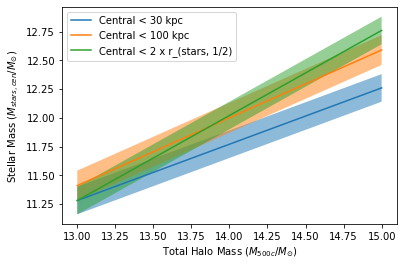

In [3]:
Mstarcentral_Mhalo_30kpc = illustris_relation(1)
Mstarcentral_Mhalo_100kpc = illustris_relation(2)
Mstarcentral_Mhalo_hmr = illustris_relation(3)

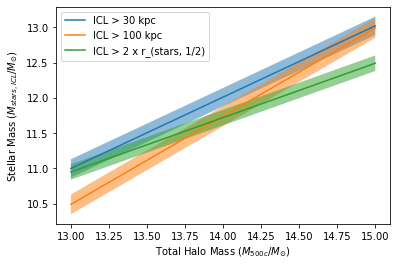

In [4]:
MstarICL_Mhalo_30kpc = illustris_relation(4)
MstarICL_Mhalo_100kpc = illustris_relation(5)
MstarICL_Mhalo_hmr = illustris_relation(6)


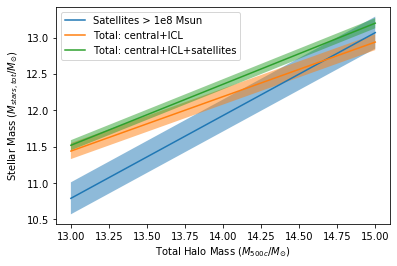

In [3]:
Mstarsat_Mhalo_1e8Msol = illustris_relation(7)
Mstardiff_Mhalo_cenICL = illustris_relation(8)
Mstartot_Mhalo_cenICLsats = illustris_relation(9) 

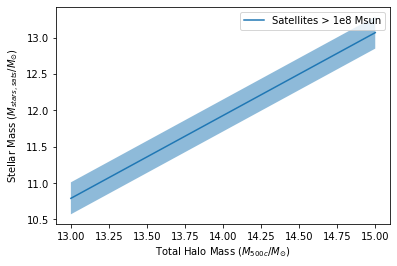

In [5]:
Mstarsat_Mhalo_1e8Msol = illustris_relation(7)

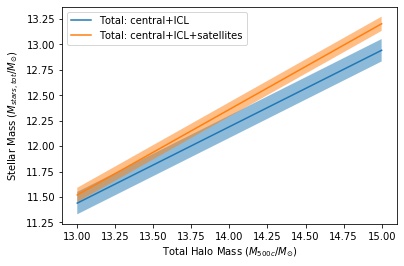

In [6]:
Mstardiff_Mhalo_cenICL = illustris_relation(8)
Mstartot_Mhalo_cenICLsats = illustris_relation(9)

array([11.52      , 11.55428571, 11.58857143, 11.62285714, 11.65714286,
       11.69142857, 11.72571429, 11.76      , 11.79428571, 11.82857143,
       11.86285714, 11.89714286, 11.93142857, 11.96571429, 12.        ,
       12.03428571, 12.06857143, 12.10285714, 12.13714286, 12.17142857,
       12.20571429, 12.24      , 12.27428571, 12.30857143, 12.34285714,
       12.37714286, 12.41142857, 12.44571429, 12.48      , 12.51428571,
       12.54857143, 12.58285714, 12.61714286, 12.65142857, 12.68571429,
       12.72      , 12.75428571, 12.78857143, 12.82285714, 12.85714286,
       12.89142857, 12.92571429, 12.96      , 12.99428571, 13.02857143,
       13.06285714, 13.09714286, 13.13142857, 13.16571429, 13.2       ])

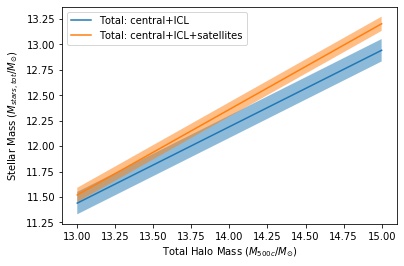

In [7]:
illustris_relation(8)
illustris_relation(9)

In [8]:
def get_R200c(M_halo, halo=True):
    if halo:
        a, b = 0.33, 2.99
    else:
        a, b = 0.70, 2.88
       
    m = M_halo - 14
    R_200c = a*m+b
    return R_200c

def get_Mstars_200c(M_halo, halo=True):
    if halo:
        a, b = 0.74, 12.04
    else:
        a, b = 1.56, 11.80
    m = M_halo - 14
    Mstars_200c = a*m+b
    return Mstars_200c

def get_sigmoidal_slope(M_halo, halo=True):
    if halo:
        a, b = -0.25, 2.14
    else:
        a, b = -0.52, 2.22
    m = M_halo - 14
    sigmoidal_slope = a*m+b
    return sigmoidal_slope

def get_x05(M_halo, halo=True):
    if halo:
        a, b = 0.19, -1.42
    else:
        a, b = 0.41, -1.48
    m = M_halo - 14
    x05 = a*m+b
    return x05

def enclosed_mstar(M_halo, halo=True):
    logR200c = get_R200c(M_halo, halo=halo)
    logMstar_norm = get_Mstars_200c(M_halo)
    slope = get_sigmoidal_slope(M_halo)
    x05 = get_x05(M_halo)
    
    lograd = np.linspace(0, 4)
    print(M_halo, logMstar_norm, logR200c)
    xx = lograd - logR200c
    
    Mstar_enclosed  = 10**logMstar_norm / (1+np.exp(-slope*(xx-x05)))
    Mstar_enclosed_frac = 10**(np.log10(Mstar_enclosed) - logMstar_norm)

    return xx, Mstar_enclosed_frac


13 11.299999999999999 2.66
13 11.299999999999999 2.66
14 12.04 2.99
14 12.04 2.99
15 12.78 3.3200000000000003
15 12.78 3.3200000000000003


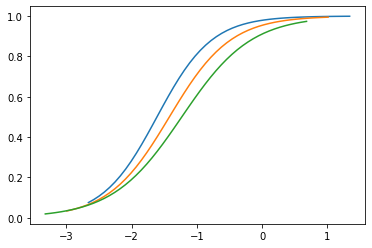

In [9]:
fig, ax = plt.subplots()
for mhalo in (13, 14, 15):
    rad, mstar = enclosed_mstar(mhalo)
    ax.plot(rad, mstar)
    rad, mstar = enclosed_mstar(mhalo, halo=True)